In [420]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk

In [421]:
header_names = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight','Rings']
abalone_df = pd.read_csv(r'C:/Users/Dmitry/Python/abalone/abalone.data', sep=',', names=header_names)

In [422]:
abalone_df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [423]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex              4177 non-null object
Length           4177 non-null float64
Diameter         4177 non-null float64
Height           4177 non-null float64
WholeWeight      4177 non-null float64
ShuckedWeight    4177 non-null float64
VisceraWeight    4177 non-null float64
ShellWeight      4177 non-null float64
Rings            4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [424]:
abalone_df.describe(include="all")

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


In [425]:
abalone_df.isna().sum()

Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

In [426]:
print('Try to Add synthetic features')
abalone_df['HeightToWeigh'] = abalone_df['Height'] / abalone_df['WholeWeight']
abalone_df['LengthToWeight'] = abalone_df['Length'] / abalone_df['WholeWeight']
#abalone_df['ShuckedSpecWeight'] = abalone_df['ShuckedWeight'] / abalone_df['WholeWeight']
#abalone_df['ShuckedSpecWeight'] = abalone_df['ShuckedWeight'] / abalone_df['WholeWeight']
#abalone_df['VisceraSpecWeight'] = abalone_df['VisceraWeight'] / abalone_df['WholeWeight']
#abalone_df['ShellSpecWeight'] = abalone_df['ShellWeight'] / abalone_df['WholeWeight']

Try to Add synthetic features


In [427]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
WholeWeight       4177 non-null float64
ShuckedWeight     4177 non-null float64
VisceraWeight     4177 non-null float64
ShellWeight       4177 non-null float64
Rings             4177 non-null int64
HeightToWeigh     4177 non-null float64
LengthToWeight    4177 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 359.0+ KB


In [428]:
x_df = abalone_df.drop(['Sex', 'Rings'], axis=1)
y_df = abalone_df['Rings']
#y_df = pd.DataFrame(abalone_df['Rings'], columns=['Rings'])
num_cols = x_df.select_dtypes(include='number').columns
x_df = x_df[num_cols]

In [429]:
x_df.head()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,HeightToWeigh,LengthToWeight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.184825,0.885214
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.399113,1.552106
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0.199409,0.782866
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.242248,0.852713
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.390244,1.609756


In [430]:
from sklearn.preprocessing import MinMaxScaler
print("Dataset features normalization")
scaler = MinMaxScaler()
for c in num_cols:
    x_df[c] = scaler.fit_transform(x_df[[c]])

Dataset features normalization


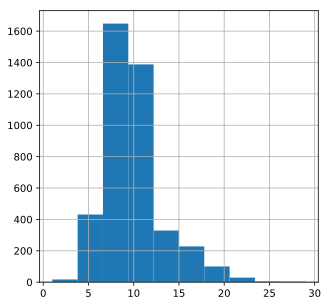

In [431]:
y_df.hist(figsize=(5, 5));

Correlation matrix (numeric features and metrics)


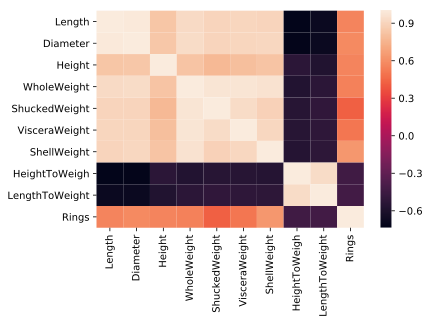

In [432]:
print('Correlation matrix (numeric features and metrics)')
df1 = pd.concat([x_df, y_df], axis=1)
corr_matrix = df1.corr()
sns.heatmap(corr_matrix);

In [433]:
print('Remove weak correlated features')
x_df = x_df.drop(['ShuckedWeight'], axis=1)
num_cols = x_df.select_dtypes(include='number').columns

Remove weak correlated features


PairPlots


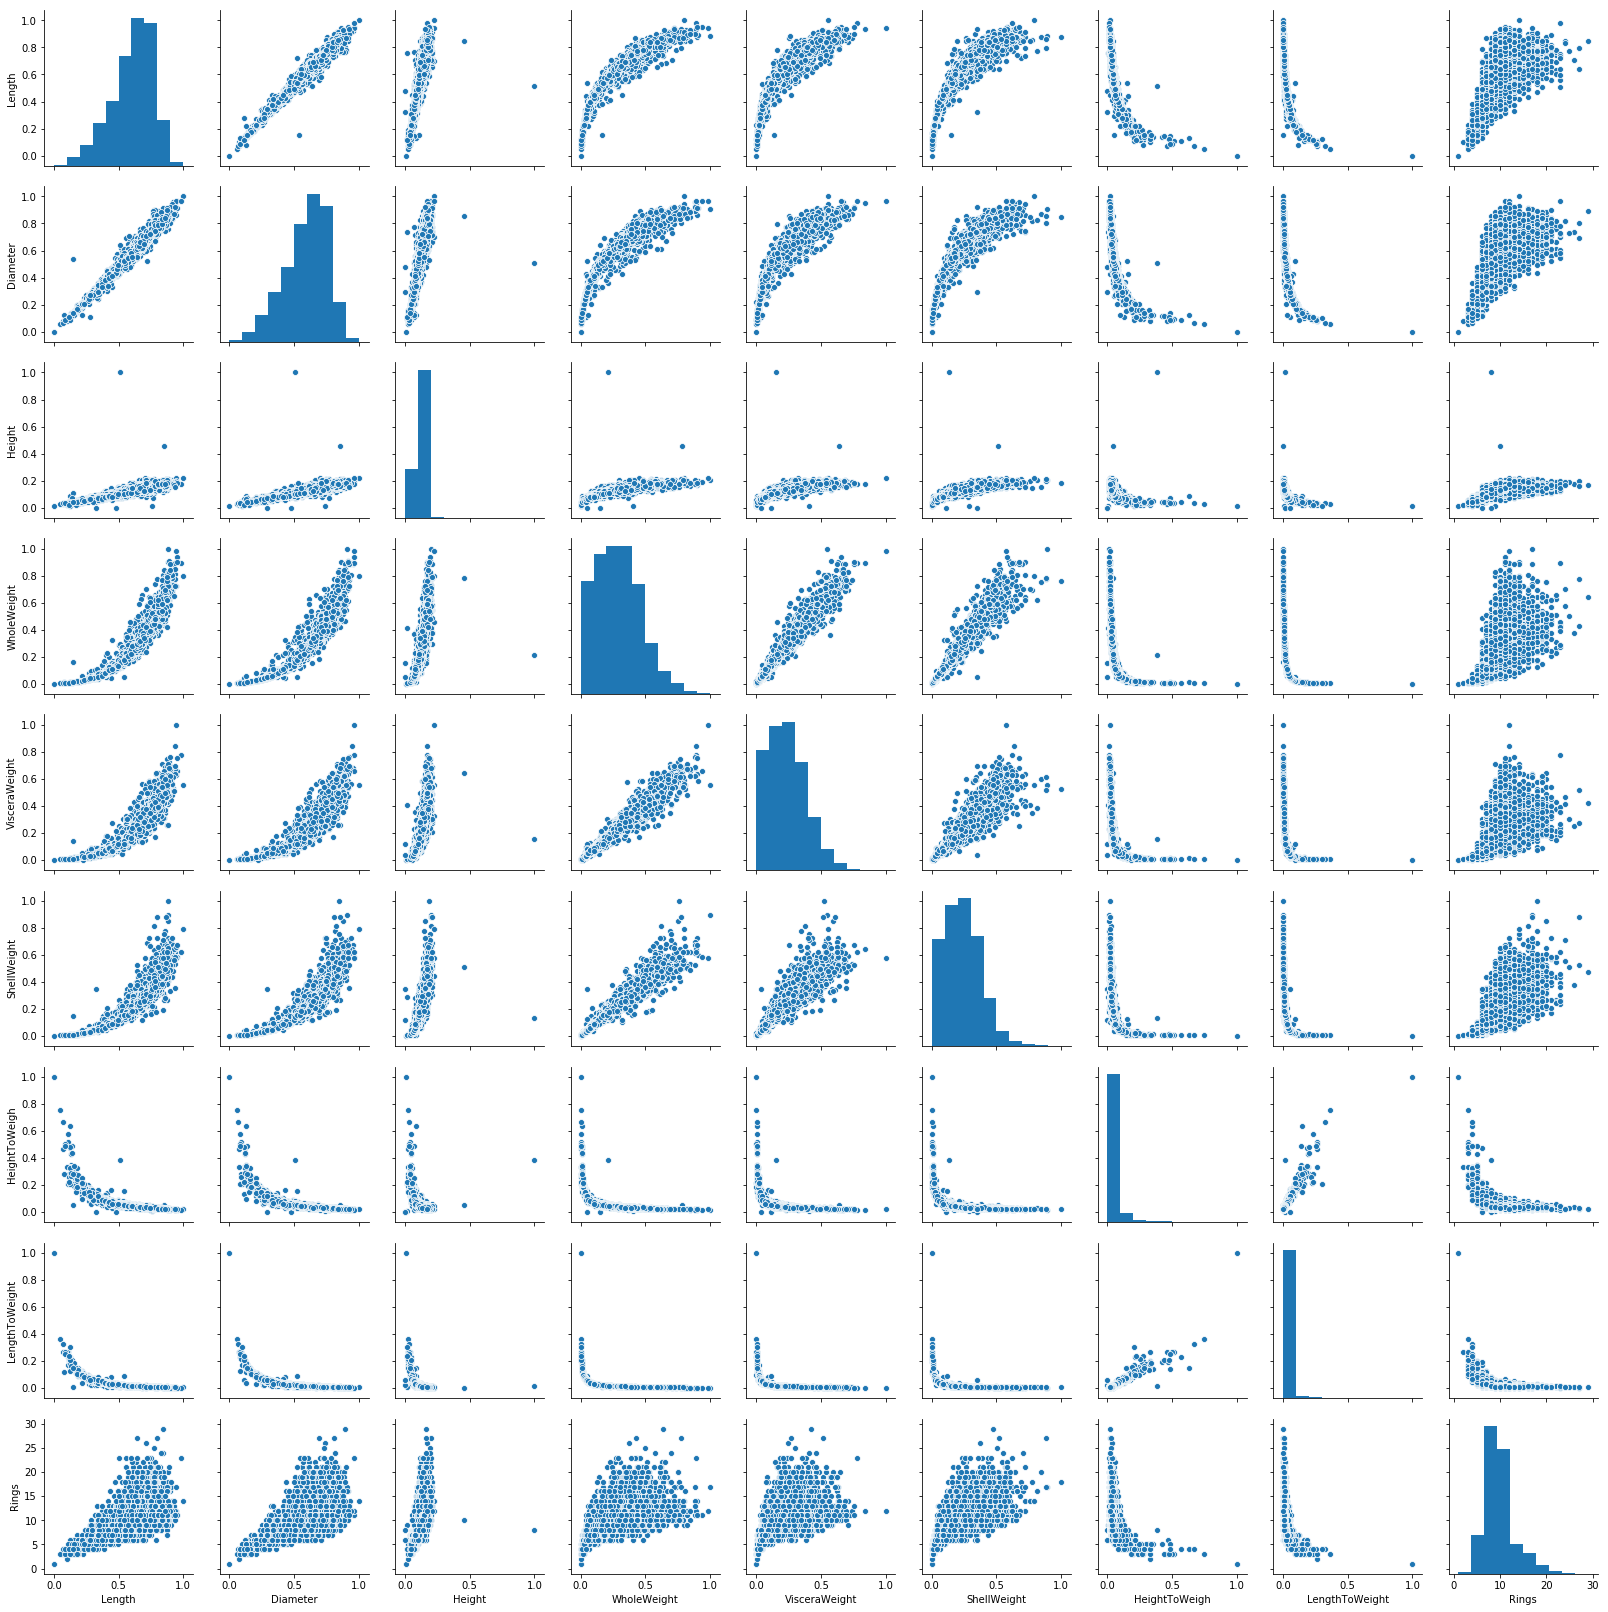

In [316]:
print('PairPlots')
%config InlineBackend.figure_format = 'png'
df1 = pd.concat([x_df, y_df], axis=1)
sns.pairplot(df1);

In [434]:
%config InlineBackend.figure_format = 'svg'

In [435]:
print("Task 1.1. Fit and validate a benchmark model: Regression model with numeric Target Rings")

Task 1.1. Fit and validate a benchmark model: Regression model with numeric Target Rings


In [436]:
from sklearn.linear_model import LinearRegression

In [437]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [438]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=17)
print('Lengths:', len(x_train), len(x_valid), len(x_test))

Lengths: 2338 1003 836


In [439]:
def check_regression_model(r, x_v, y_v):
    y_p = r.predict(x_v)
    return mean_squared_error(y_v, y_p), mean_absolute_error(y_v, y_p), r2_score(y_v, y_p)

In [440]:
print('Train & Analize the Linear regression model with the default parameters')
l_reg = LinearRegression()
l_reg = l_reg.fit(x_train, y_train)

Train & Analize the Linear regression model with the default parameters


In [441]:
print('Try to get Regression models metrics: MSE, MAE, R2')

Try to get Regression models metrics: MSE, MAE, R2


In [442]:
mse, mae, r2 = check_regression_model(l_reg, x_valid, y_valid)
print(f'Linear regression model validation metrics: MSE: {mse} MAE: {mae} R^2 score {r2}')

Linear regression model validation metrics: MSE: 5.640501922965302 MAE: 1.6856180338594924 R^2 score 0.47129218964431085


In [443]:
mse, mae, r2 = check_regression_model(l_reg, x_test, y_test)
print(f'Linear regression model test metrics: MSE: {mse} MAE: {mae} R^2 score {r2}')

Linear regression model test metrics: MSE: 6.4347280819503085 MAE: 1.7112483277498984 R^2 score 0.41071692466710463


In [444]:
print("Task 1.2. Fit and validate a Classification model with Target Rings")

Task 1.2. Fit and validate a Classification model with Target Rings


In [445]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [446]:
def check_classification_model(r, x_v, y_v):
    y_p = r.predict(x_v)
    return accuracy_score(y_v, y_p), \
precision_score(y_v, y_p, average='macro'), \
recall_score(y_v, y_p, average='macro'), \
f1_score(y_v, y_p, average='macro')

In [448]:
print('Train & Analize the Classification model with the default parameters')
clf = LogisticRegression(multi_class='ovr', solver='lbfgs')
clf = clf.fit(x_train, y_train)

Train & Analize the Classification model with the default parameters


In [449]:
print('Try to get Classification model metrics:')

Try to get Classification model metrics:


In [450]:
acc, pr, rc, f1 = check_classification_model(clf, x_valid, y_valid)
print(f'Linear regression model validation metrics: Accuracy: {acc} Precision: {pr} Recall: {rc} F-score: {f1}')

Linear regression model validation metrics: Accuracy: 0.27018943170488535 Precision: 0.07689218648701551 Recall: 0.08670528084532936 F-score: 0.07697393195336069


C:\Users\Dmitry\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dmitry\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [451]:
print("Task 2. Fit and validate a Classification model with category Target Sex")

Task 2. Fit and validate a Classification model with category Target Sex


In [452]:
x_df = abalone_df.drop(['Sex'], axis=1)
num_cols = x_df.select_dtypes(include='number').columns
x_df = x_df[num_cols]

In [453]:
x_df["Rings"] = x_df["Rings"].astype(float)

In [454]:
x_df.head()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,HeightToWeigh,LengthToWeight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0,0.184825,0.885214
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0,0.399113,1.552106
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0,0.199409,0.782866
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0,0.242248,0.852713
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0,0.390244,1.609756


In [455]:
print('Fit Category Target')
from sklearn.preprocessing import LabelEncoder
y_df = abalone_df['Sex']
le = LabelEncoder()
y_df = le.fit_transform(y_df)

Fit Category Target


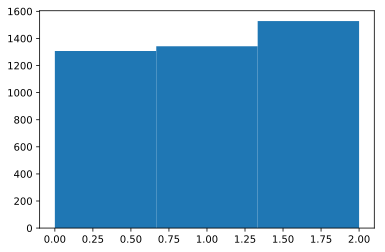

In [456]:
import matplotlib.pyplot as plt
plt.hist(y_df, bins=3);

Correlation matrix (numeric features and metrics)


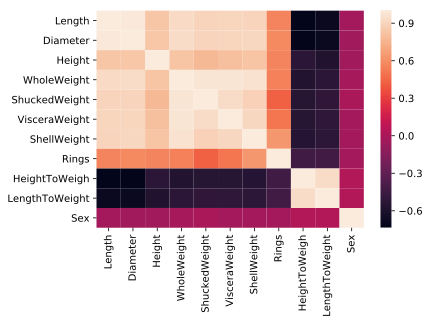

In [457]:
print('Correlation matrix (numeric features and metrics)')
y_df = pd.DataFrame(y_df, columns=['Sex'])
df1 = pd.concat([x_df, y_df], axis=1)
corr_matrix = df1.corr()
sns.heatmap(corr_matrix);

In [458]:
categories = np.unique(y_df)
print(categories)

[0 1 2]


In [459]:
from sklearn.preprocessing import MinMaxScaler
print("Dataset features normalization")
scaler = MinMaxScaler()
for c in num_cols:
    x_df[c] = scaler.fit_transform(x_df[[c]])

Dataset features normalization


In [461]:
print('Try to Fit the Features')
from sklearn.feature_selection import RFE
model = LogisticRegression(multi_class='ovr', solver='lbfgs')
rfe = RFE(estimator=model, n_features_to_select=5)
y_df = abalone_df['Sex']
rfe.fit(x_df, y_df)
selected_indices = rfe.get_support(indices=True)
x_df = x_df.iloc[:, selected_indices]

Try to Fit the Features


In [462]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 5 columns):
Diameter         4177 non-null float64
WholeWeight      4177 non-null float64
ShuckedWeight    4177 non-null float64
VisceraWeight    4177 non-null float64
Rings            4177 non-null float64
dtypes: float64(5)
memory usage: 163.2 KB


In [463]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=17)
print('Lengths:', len(x_train), len(x_valid), len(x_test))

Lengths: 2338 1003 836


In [464]:
print('Train & Analize the Classification model with the default parameters')
clf = LogisticRegression(multi_class='ovr', solver='lbfgs')
clf = clf.fit(x_train, y_train)

Train & Analize the Classification model with the default parameters


In [465]:
print('Try to get Classification model metrics:')

Try to get Classification model metrics:


In [466]:
acc, pr, rc, f1 = check_classification_model(clf, x_valid, y_valid)
print(f'Linear regression model validation metrics: Accuracy: {acc} Precision: {pr} Recall: {rc} F-score: {f1}')

Linear regression model validation metrics: Accuracy: 0.5274177467597209 Precision: 0.5191655729003081 Recall: 0.520225896757851 F-score: 0.4979305401405845


In [467]:
print("Task 2.1. Train a specific category of the Sex Target")

Task 2.1. Train a specific category of the Sex Target


In [468]:
("Infant")
y_df = (abalone_df['Sex'] == 'I').astype(int) 

In [469]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=17)
print('Lengths:', len(x_train), len(x_valid), len(x_test))

Lengths: 2338 1003 836


In [470]:
print('Train & Analize the Classification model with the default parameters')
clf = LogisticRegression(multi_class='ovr', solver='lbfgs')
clf = clf.fit(x_train, y_train)

Train & Analize the Classification model with the default parameters


In [471]:
print('Try to get Classification model metrics:')

Try to get Classification model metrics:


In [472]:
acc, pr, rc, f1 = check_classification_model(clf, x_valid, y_valid)
print(f'Classification model validation metrics: Accuracy: {acc} Precision: {pr} Recall: {rc} F-score: {f1}')

Classification model validation metrics: Accuracy: 0.8135593220338984 Precision: 0.7846335887237721 Recall: 0.7780430970837948 F-score: 0.7811456769033842


In [473]:
print('Male')
y_df = (abalone_df['Sex'] == 'M').astype(int) 

Male


In [474]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=17)
print('Lengths:', len(x_train), len(x_valid), len(x_test))

Lengths: 2338 1003 836


In [480]:
print('Train & Analize the Classification model with the default parameters')
clf = LogisticRegression(multi_class='ovr', solver='lbfgs')
clf = clf.fit(x_train, y_train)

Train & Analize the Classification model with the default parameters


In [481]:
print('Try to get Classification model metrics:')

Try to get Classification model metrics:


In [482]:
acc, pr, rc, f1 = check_classification_model(cls, x_valid, y_valid)
print(f'Classification model validation metrics: Accuracy: {acc} Precision: {pr} Recall: {rc} F-score: {f1}')

Classification model validation metrics: Accuracy: 0.6410767696909272 Precision: 0.5743405275779376 Recall: 0.538810641627543 F-score: 0.5165799113167535


In [483]:
print('Female')
y_df = (abalone_df['Sex'] == 'F').astype(int) 

Female


In [484]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=17)
print('Lengths:', len(x_train), len(x_valid), len(x_test))

Lengths: 2338 1003 836


In [485]:
print('Train & Analize the Classification model with the default parameters')
clf = LogisticRegression(multi_class='ovr', solver='lbfgs')
clf = clf.fit(x_train, y_train)

Train & Analize the Classification model with the default parameters


In [486]:
print('Try to get Classification model metrics:')

Try to get Classification model metrics:


In [487]:
acc, pr, rc, f1 = check_classification_model(clf, x_valid, y_valid)
print(f'Classification model validation metrics: Accuracy: {acc} Precision: {pr} Recall: {rc} F-score: {f1}')

Classification model validation metrics: Accuracy: 0.6769690927218345 Precision: 0.6002824858757062 Recall: 0.5476031382388771 F-score: 0.5299036002360811


In [488]:
print('Task 3. SVM model')

Task 3. SVM model


In [489]:
y_df = abalone_df['Sex']
le = LabelEncoder()
y_df = le.fit_transform(y_df)

In [490]:
from sklearn.svm import SVC

In [491]:
clf = SVC(kernel='linear', C=1, random_state=17)
clf = clf.fit(x_train, y_train)

In [492]:
print('Try to get Classification model metrics:')

Try to get Classification model metrics:


In [493]:
acc, pr, rc, f1 = check_classification_model(clf, x_valid, y_valid)
print(f'SVM model validation metrics: Accuracy: {acc} Precision: {pr} Recall: {rc} F-score: {f1}')

SVM model validation metrics: Accuracy: 0.6769690927218345 Precision: 0.33848454636091724 Recall: 0.5 F-score: 0.40368608799048755


C:\Users\Dmitry\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dmitry\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [494]:
print('Task 4. KNN Model')

Task 4. KNN Model


In [495]:
from sklearn.neighbors import KNeighborsClassifier

In [496]:
clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(x_train, y_train)

In [497]:
print('Try to get Classification model metrics:')

Try to get Classification model metrics:


In [498]:
acc, pr, rc, f1 = check_classification_model(clf, x_valid, y_valid)
print(f'KNN model validation metrics: Accuracy: {acc} Precision: {pr} Recall: {rc} F-score: {f1}')

KNN model validation metrics: Accuracy: 0.6450648055832503 Precision: 0.5805340811479967 Recall: 0.5724490445280823 F-score: 0.5742743773905247
